# Applying labs to our dataset
## Lab 1

In [2]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Get the data: 

In [3]:
def load_data():
    path = 'data/StudentsPerformance.csv'
    return pd.read_csv(path)

data = load_data()
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Exploratory Data Analysis

array([[<AxesSubplot: title={'center': 'math score'}>,
        <AxesSubplot: title={'center': 'reading score'}>],
       [<AxesSubplot: title={'center': 'writing score'}>,
        <AxesSubplot: >]], dtype=object)

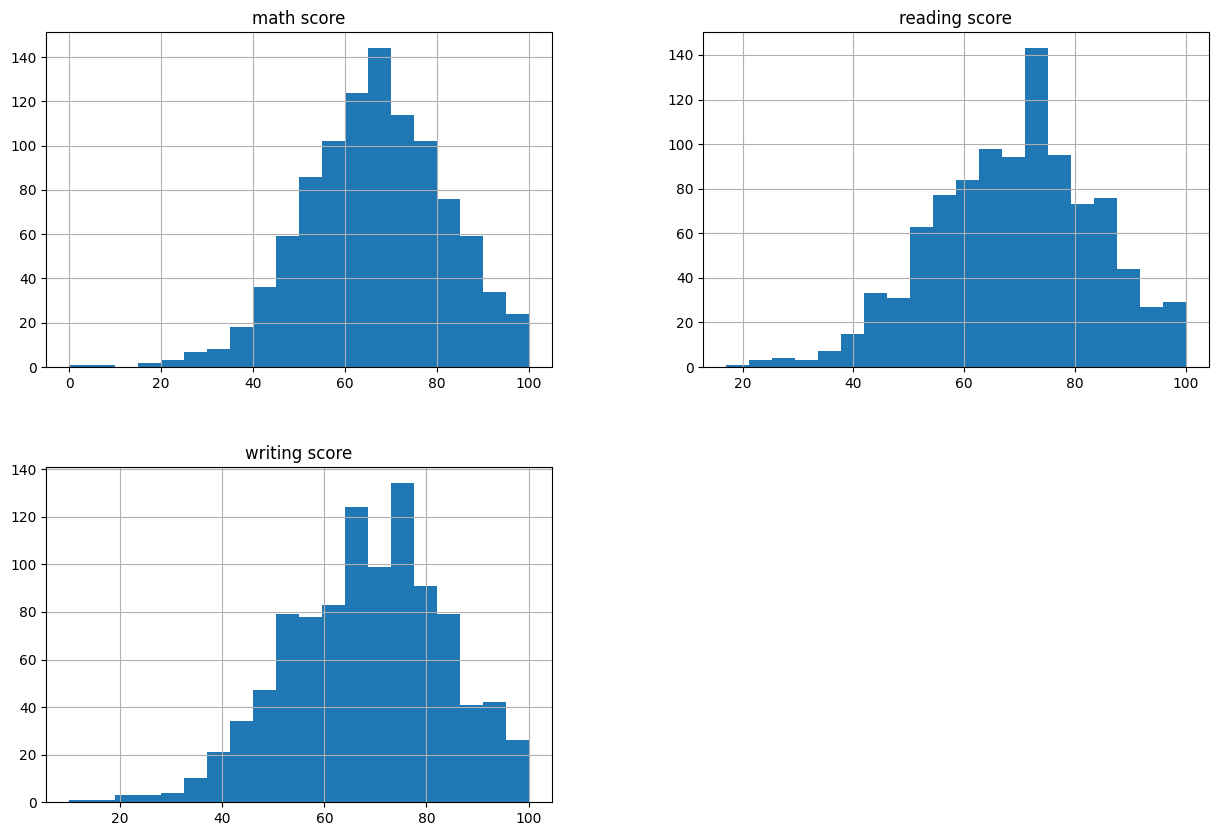

In [4]:
data.hist(bins=20, figsize=(15,10))

We can see from the scatter plot that the reading and writing scores are more correlated to each other than either with the math scores

array([[<AxesSubplot: xlabel='math score', ylabel='math score'>,
        <AxesSubplot: xlabel='reading score', ylabel='math score'>,
        <AxesSubplot: xlabel='writing score', ylabel='math score'>],
       [<AxesSubplot: xlabel='math score', ylabel='reading score'>,
        <AxesSubplot: xlabel='reading score', ylabel='reading score'>,
        <AxesSubplot: xlabel='writing score', ylabel='reading score'>],
       [<AxesSubplot: xlabel='math score', ylabel='writing score'>,
        <AxesSubplot: xlabel='reading score', ylabel='writing score'>,
        <AxesSubplot: xlabel='writing score', ylabel='writing score'>]],
      dtype=object)

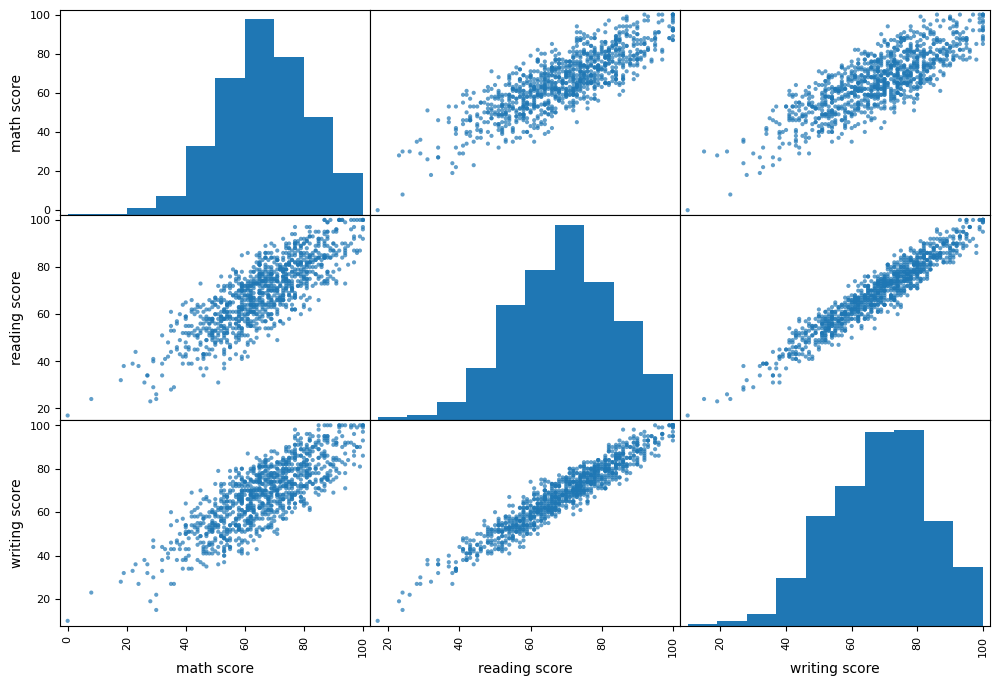

In [5]:
from pandas.plotting import scatter_matrix
test = ["math score", "reading score", "writing score"]

scatter_matrix(data[test], figsize=(12,8), alpha=0.7)

In [6]:
data["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

<AxesSubplot: >

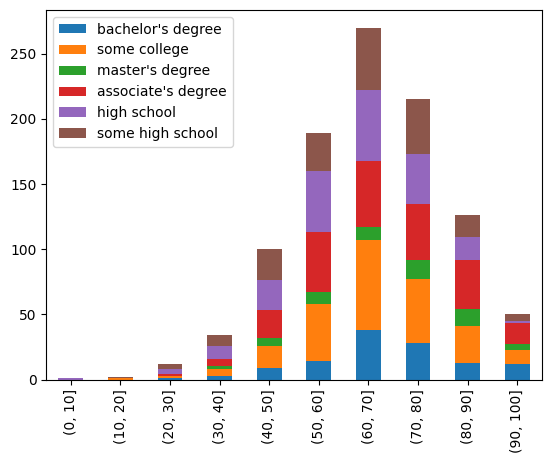

In [23]:
import math

final = {}
# This bins the data for each parental education level in ranges of 10%
for edu in data["parental level of education"].unique():
    h = data.loc[data["parental level of education"] == edu]
    eh = pd.cut(h["math score"], bins=[0,10,20,30,40,50,60,70,80,90,100], include_lowest=False)
    eh = eh.value_counts(sort=False)
    final[edu] = eh

# Create a dataframe with the binned data
t = pd.DataFrame({
    "some high school": final["some high school"],
    "high school": final["high school"],
    "some college": final["some college"],
    "associate's degree": final["associate's degree"],
    "bachelor's degree": final["bachelor's degree"],
    "master's degree": final["master's degree"]
}, columns=data["parental level of education"].unique())
t.plot.bar(stacked=True)



Should probably do something for average score rather than quantity

(0, 10]        1
(10, 20]       2
(20, 30]      10
(30, 40]      27
(40, 50]      76
(50, 60]     129
(60, 70]     173
(70, 80]     131
(80, 90]      73
(90, 100]     19
Name: math score, dtype: int64


<AxesSubplot: >

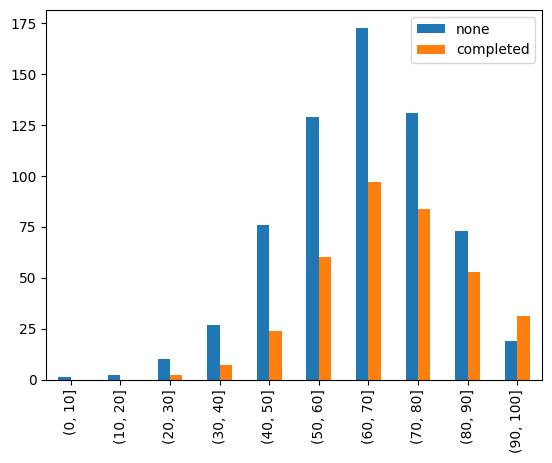

In [34]:
final = {}
for prep in data["test preparation course"].unique():
    p = data.loc[data["test preparation course"] == prep]
    p = pd.cut(p["math score"], bins=[0,10,20,30,40,50,60,70,80,90,100], include_lowest=False)
    p = p.value_counts(sort=False)
    final[prep] = p

print(final['none'])

e = pd.DataFrame({
    "completed": final["completed"],
    "none": final["none"]
},
columns=data["test preparation course"].unique())

e.plot.bar()

In [7]:
data.describe()  # analyses numeric columns

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

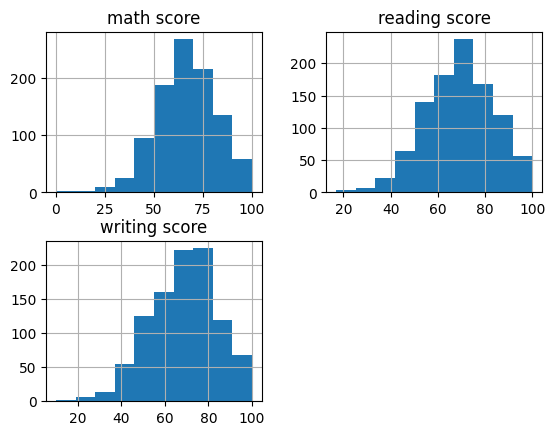

In [5]:
data.hist()

### Correlation between Scores
An overview of the correlation between
- reading and writing
- maths and writing
- maths and reading

<AxesSubplot:xlabel='math score', ylabel='reading score'>

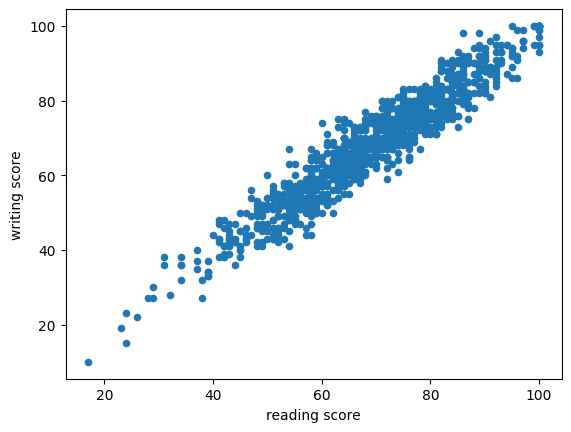

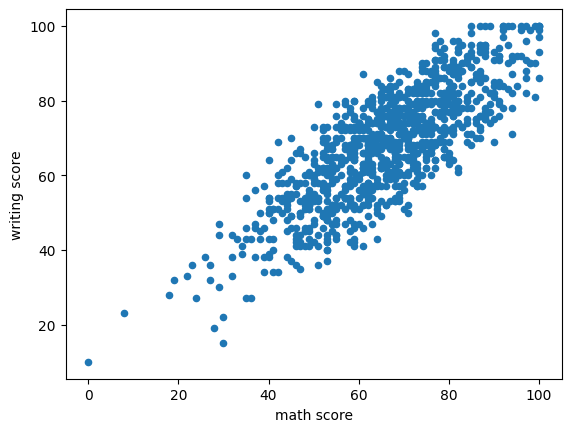

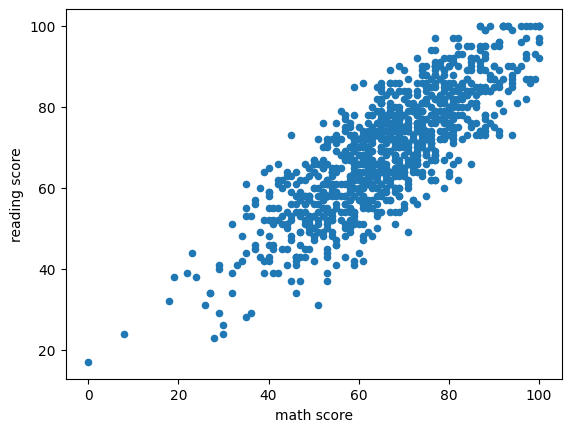

In [6]:
data.plot(x='reading score', y='writing score', kind='scatter')
data.plot(x='math score', y='writing score', kind='scatter')
data.plot(x='math score', y='reading score', kind='scatter')

## Lab 2
Data Normalization & Factorization

In [7]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


We need to factorize our categorical columns, so that all our data is numerical. 

In [8]:
# Keep hold of the original dataframe. 
df = data.copy()

# In our data, the ordinal columns would be: 'parental level of education'. 
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder()  # TODO: 
df['parental level of education'] = ordinal_enc.fit_transform(df[['parental level of education']])

df.head()  # Data with numerical values for 'parental level of education'.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,1.0,standard,none,72,72,74
1,female,group C,4.0,standard,completed,69,90,88
2,female,group B,3.0,standard,none,90,95,93
3,male,group A,0.0,free/reduced,none,47,57,44
4,male,group C,4.0,standard,none,76,78,75


In [9]:
# Now our leftover categorical values are all without any natural ordering. The following columns must be transformed: gender, ethnicity, lunch, test preparation course.
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(drop='if_binary', sparse=False)

# The following attributes are all binary attributes and since drop = 'if_binary', the encoder will drop the second column as it is redundant information.
binary_onehot = data[['gender', 'lunch', 'test preparation course']]
df[['gender', 'lunch', 'test preparation course']] = onehot_enc.fit_transform(binary_onehot)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,group B,1.0,1.0,1.0,72,72,74
1,0.0,group C,4.0,1.0,0.0,69,90,88
2,0.0,group B,3.0,1.0,1.0,90,95,93
3,1.0,group A,0.0,0.0,1.0,47,57,44
4,1.0,group C,4.0,1.0,1.0,76,78,75


In [10]:
# Now the only leftover categorical data is 'race/ethnicity'. Let's convert this as well. 
df[['ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E']] = onehot_enc.fit_transform(df[['race/ethnicity']])

df = df.drop(axis=1, columns=['race/ethnicity'])  # Drop the column containing categorical data.
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E
0,0.0,1.0,1.0,1.0,72,72,74,0.0,1.0,0.0,0.0,0.0
1,0.0,4.0,1.0,0.0,69,90,88,0.0,0.0,1.0,0.0,0.0
2,0.0,3.0,1.0,1.0,90,95,93,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,47,57,44,1.0,0.0,0.0,0.0,0.0
4,1.0,4.0,1.0,1.0,76,78,75,0.0,0.0,1.0,0.0,0.0


### Splitting into train and test set and scaling

In [11]:
# Data where we keep the maths score numerical: 
X = df[['gender', 'parental level of education', 'lunch', 'test preparation course', 'ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E', 'reading score', 'writing score']]
y = df[['math score']]

X.head()

,gender,parental level of education,lunch,test preparation course,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E,reading score,writing score
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,72,74
1,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,90,88
2,0.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,95,93
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,57,44
4,1.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,78,75


In [12]:
# Data where we turn the maths score into categories of A, B, C, D, FAIL
# Discretize the data back into string format
def binFunction(row):
    if row["math score"] >= 70:
        return "A"
    elif row["math score"] >= 60:
        return "B"
    elif row["math score"] >= 50:
        return "C"
    elif row["math score"] >= 40:
        return "D"
    else:
        return "FAIL"
    
score_labels = ["F", "D", "C", "B", "A"]
exam_data_copy = df.copy()

# exam_data_copy["math score"] = pd.cut(exam_data_copy["math score"], bins = 5, labels=score_labels)

# data_categorical_target = exam_data_copy.apply(binFunction, axis=1)

# exam_data_copy

In [13]:
# Uncomment this if you want categorical data 

# X = exam_data_copy[['gender', 'parental level of education', 'lunch', 'test preparation course', 'ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E', 'reading score', 'writing score']]
# y = exam_data_copy[['math score']]

In [14]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

def scale_min_max(X, y): 
    scaler = MinMaxScaler()  # The skaler for the data.
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y)
    return X_scaled, y_scaled

In [15]:
# Split into train and test set. 
from sklearn.model_selection import train_test_split

X_scaled, y_scaled = scale_min_max(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

## Lab 3
1. Analyse most correlating features/attributes of the data set, generally and per class. 
2. Form 3 data sets, that contain progressively fewer features/attributes. 

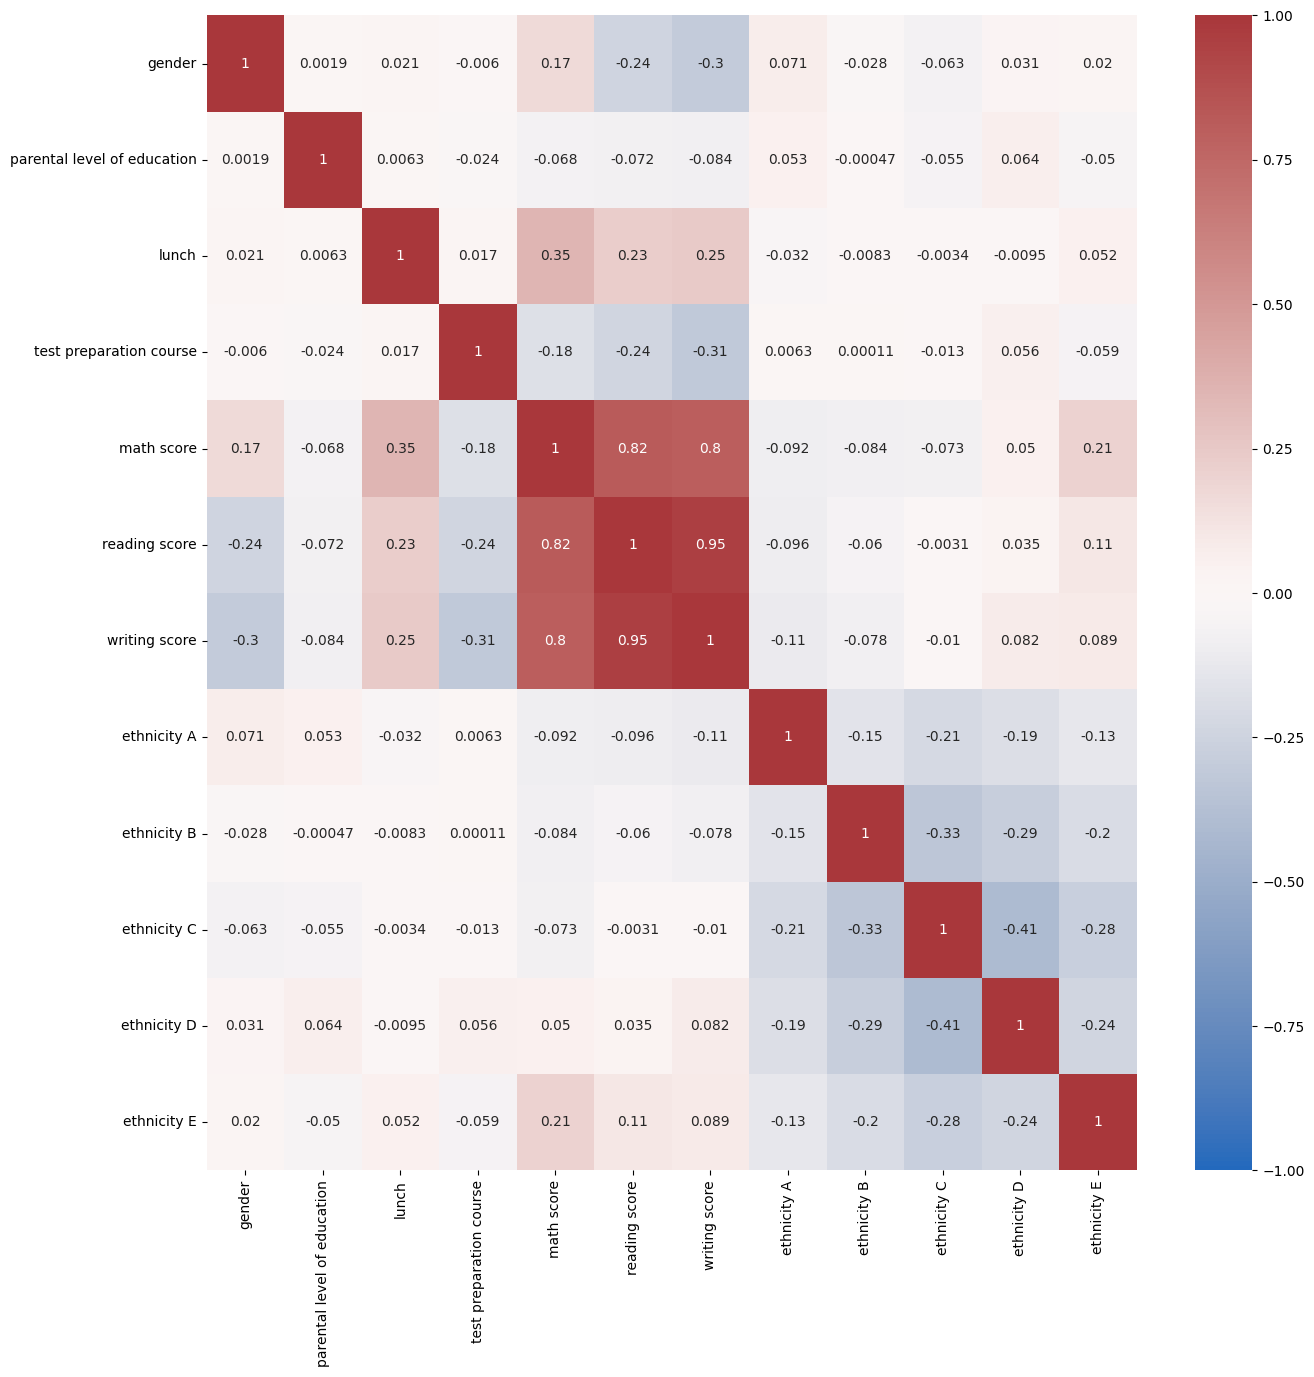

In [16]:
import seaborn as sns 

# Correlation Matrix: 
corr_matrix = df.corr(method='pearson')

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=ax)
plt.show()

In [17]:
# Correlation of all columns to the math score
corr_math = corr_matrix.iloc[4].map(lambda x: abs(x))
corr_math.sort_values(ascending=False)

math score                     1.000000
reading score                  0.817580
writing score                  0.802642
lunch                          0.350877
ethnicity E                    0.205855
test preparation course        0.177702
gender                         0.167982
ethnicity A                    0.091977
ethnicity B                    0.084250
ethnicity C                    0.073387
parental level of education    0.068279
ethnicity D                    0.050071
Name: math score, dtype: float64

In [18]:
data_top_correlation_features = df[['writing score', 'math score', 'gender']]

Task: Run a classifier of your choice on the original and smaller data sets, and record their accuracy on these datasets.  
First, the **Original Dataset**:

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Check the accuracy of the LinearRegression model.
accuracy_data = pd.DataFrame(lr.predict(X_train))
accuracy_data['target'] = y_train

lr.score(X_test, y_test)

0.8863870267615179

Now let's see if there's a difference in accuracy when we only train with the top correlated features. Keep in mind that accuracy is not necessarily the best measure to evaluate a model. 

In [20]:
X_two_train, X_two_test, y_two_train, y_two_test = train_test_split(
    data_top_correlation_features, df[['math score']]
)

In [21]:
# 3 features. 
lr_three = LinearRegression() 
lr_three.fit(X_two_train, y_two_train)

acc_two = pd.DataFrame(
    {'Actual': y_two_test.squeeze(), 'Predicted:': lr_three.predict(X_two_test).squeeze()}
)
lr_three.score(X_two_test, y_two_test)

1.0

## Lab 4
Do classifier testing and evaluation. Run any classifier model of your choice on your data set and record the major metrics: 
- accuracy, 
- TP rate (true-positive)
- FP rate (false-positive)
- precision
- recall
- F-measure
- ROC area
Then plot your confusion matrix and make comparisons between different evaluation metrics. Which ones seem more suitable for your data set?  

In [22]:
exam_data_copy['math score']

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [23]:
# Change to dataset where 'math score' is categorical. 

def binFunction(row):
    if row["math score"] >= 70:
        return 1
    else:
        return 0
    
data_categorical_target = df.copy().apply(binFunction, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data_categorical_target)

Now let's run the Stochastic Gradient Descent Classifier on it. 

In [24]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [25]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

y_true = y_test
y_pred = sgd_clf.predict(X_test)

In [26]:
def getMetrics(y_true, y_pred):
    # Keeping track of all the metrics. 
    metrics = {}

    # For the accuracy. 
    from sklearn.metrics import accuracy_score
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    metrics['accuracy']
    
    # Confusion Matrix. 
    from sklearn.metrics import confusion_matrix
    con_matrix = confusion_matrix(y_true, y_pred)
    
    # True Positive, False Positive, True Negative, False Negative
    metrics['TP'] = con_matrix[0][0]
    metrics['FP'] = con_matrix[0][1]
    metrics['TN'] = con_matrix[1][1]
    metrics['FN'] = con_matrix[1][0]
    
    # Sensitivity & Specificity
    metrics['sensitivity'] = metrics['TP'] / (metrics['TP'] + metrics['FN'])
    metrics['specificity'] = metrics['TN'] / (metrics['TN'] + metrics['FP'])

    # For recall & precision. 
    from sklearn.metrics import precision_score, recall_score

    metrics['precision'] = precision_score(y_true, y_pred)
    metrics['recall'] = recall_score(y_true, y_pred)

    # F-measure. 
    from sklearn.metrics import f1_score

    metrics['f1-score'] = f1_score(y_true, y_pred)

    # ROC area. 
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve

    metrics['roc-area'] = roc_auc_score(y_true, y_pred)

    import matplotlib.pyplot as plt
    fpr, tpr, _ = roc_curve(y_true, y_pred)

    #create ROC curve
    plt.plot(fpr, tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    print(pd.DataFrame([metrics]))
    
    return metrics

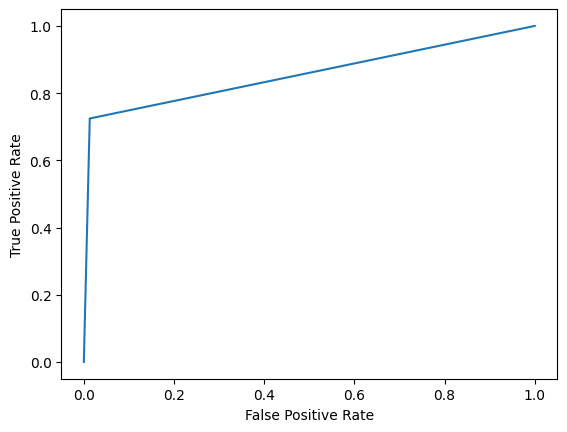

   accuracy   TP  FP  TN  FN  sensitivity  specificity  precision   recall  \
0     0.884  150   2  71  27     0.847458     0.972603   0.972603  0.72449   

   f1-score  roc-area  
0  0.830409  0.855666  


{'accuracy': 0.884,
 'TP': 150,
 'FP': 2,
 'TN': 71,
 'FN': 27,
 'sensitivity': 0.847457627118644,
 'specificity': 0.9726027397260274,
 'precision': 0.9726027397260274,
 'recall': 0.7244897959183674,
 'f1-score': 0.8304093567251463,
 'roc-area': 0.8556659505907626}

In [27]:
# Get metrics for SDG Classifier 
getMetrics(y_true, y_pred)

<AxesSubplot:>

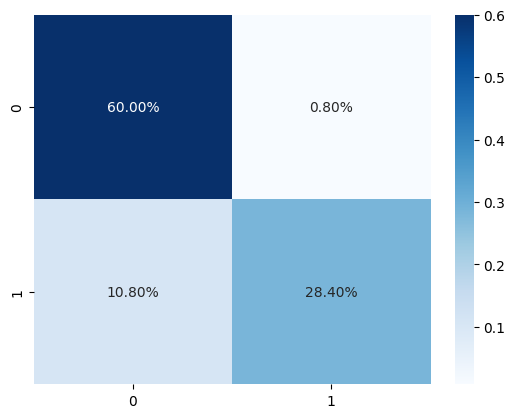

In [28]:
from sklearn.metrics import confusion_matrix

gender_confusion_matrix = confusion_matrix(y_true, y_pred)

# For plotting the matrix.
sns.heatmap(gender_confusion_matrix / np.sum(gender_confusion_matrix), annot=True, fmt='.2%', cmap='Blues')

## Lab 5

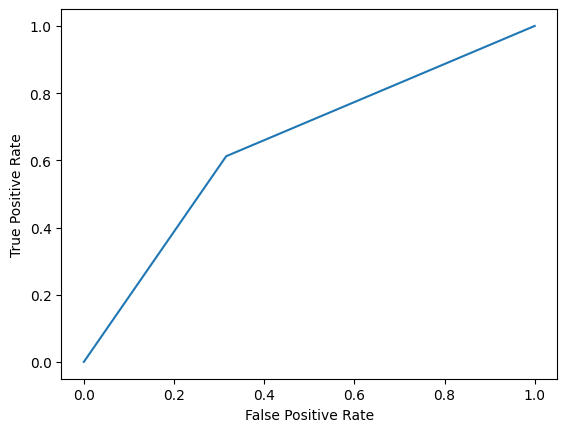

   accuracy   TP  FP  TN  FN  sensitivity  specificity  precision    recall  \
0     0.656  104  48  60  38     0.732394     0.555556   0.555556  0.612245   

   f1-score  roc-area  
0  0.582524  0.648228  


{'accuracy': 0.656,
 'TP': 104,
 'FP': 48,
 'TN': 60,
 'FN': 38,
 'sensitivity': 0.7323943661971831,
 'specificity': 0.5555555555555556,
 'precision': 0.5555555555555556,
 'recall': 0.6122448979591837,
 'f1-score': 0.5825242718446603,
 'roc-area': 0.6482277121374865}

In [29]:
from sklearn.naive_bayes import MultinomialNB

# Create, fit, and predict a Multinomial model using the data set
multi_nom = MultinomialNB(alpha=1.0, fit_prior=False)
multi_nom.fit(X_train, y_train)
multi_nom_y_pred = multi_nom.predict(X_test)

# Get relevant metrics
getMetrics(y_test, multi_nom_y_pred)

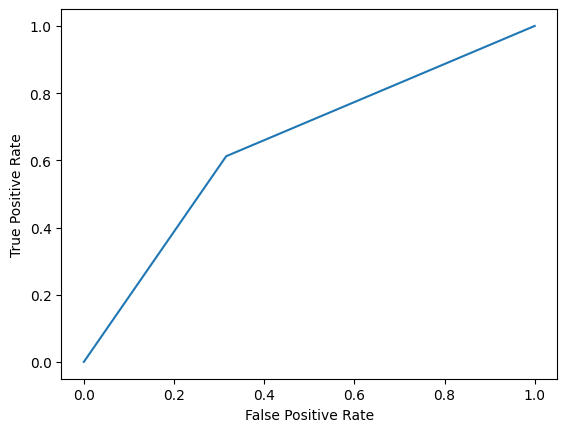

   accuracy   TP  FP  TN  FN  sensitivity  specificity  precision    recall  \
0     0.656  104  48  60  38     0.732394     0.555556   0.555556  0.612245   

   f1-score  roc-area  
0  0.582524  0.648228  


{'accuracy': 0.656,
 'TP': 104,
 'FP': 48,
 'TN': 60,
 'FN': 38,
 'sensitivity': 0.7323943661971831,
 'specificity': 0.5555555555555556,
 'precision': 0.5555555555555556,
 'recall': 0.6122448979591837,
 'f1-score': 0.5825242718446603,
 'roc-area': 0.6482277121374865}

In [30]:
from sklearn.naive_bayes import ComplementNB

clf = ComplementNB(alpha=1.0, fit_prior=False)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

getMetrics(y_test, clf_pred)

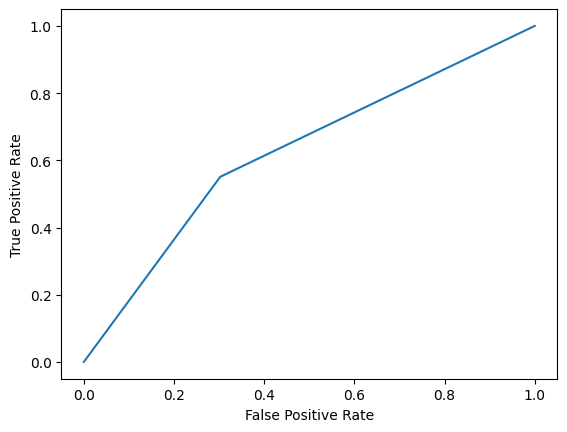

   accuracy   TP  FP  TN  FN  sensitivity  specificity  precision   recall  \
0      0.64  106  46  54  44     0.706667         0.54       0.54  0.55102   

   f1-score  roc-area  
0  0.545455  0.624194  


{'accuracy': 0.64,
 'TP': 106,
 'FP': 46,
 'TN': 54,
 'FN': 44,
 'sensitivity': 0.7066666666666667,
 'specificity': 0.54,
 'precision': 0.54,
 'recall': 0.5510204081632653,
 'f1-score': 0.5454545454545455,
 'roc-area': 0.6241944146079484}

In [31]:
from sklearn.naive_bayes import CategoricalNB

cat_nb = CategoricalNB(alpha=1.0, fit_prior=False)
cat_nb.fit(X_train, y_train)
cat_nb_pred = cat_nb.predict(X_test)

getMetrics(y_test, cat_nb_pred)

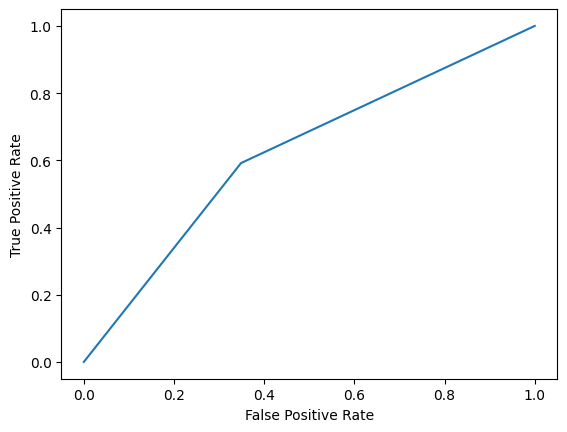

   accuracy  TP  FP  TN  FN  sensitivity  specificity  precision    recall  \
0     0.628  99  53  58  40      0.71223     0.522523   0.522523  0.591837   

   f1-score  roc-area  
0  0.555024  0.621576  


{'accuracy': 0.628,
 'TP': 99,
 'FP': 53,
 'TN': 58,
 'FN': 40,
 'sensitivity': 0.7122302158273381,
 'specificity': 0.5225225225225225,
 'precision': 0.5225225225225225,
 'recall': 0.5918367346938775,
 'f1-score': 0.5550239234449761,
 'roc-area': 0.6215762620837809}

In [32]:
from sklearn.naive_bayes import BernoulliNB

benoulli_nb = BernoulliNB(alpha=1.0, fit_prior=False)
benoulli_nb.fit(X_train, y_train)
benoulli_nb_pred = benoulli_nb.predict(X_test)

getMetrics(y_test, benoulli_nb_pred)

In [33]:
from pgmpy.models import BayesianModel

bayesian_model = BayesianModel([
    ("gender", "lunch"), 
    ("lunch", "parental level of education"), 
    ("parental level of education", "math score")
])

c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [34]:
bayesian_model.fit(data)

In [35]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(bayesian_model)
q = infer.query(variables=["math score"],evidence={"gender": "male"})

values = q.values
len(values)

c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


81

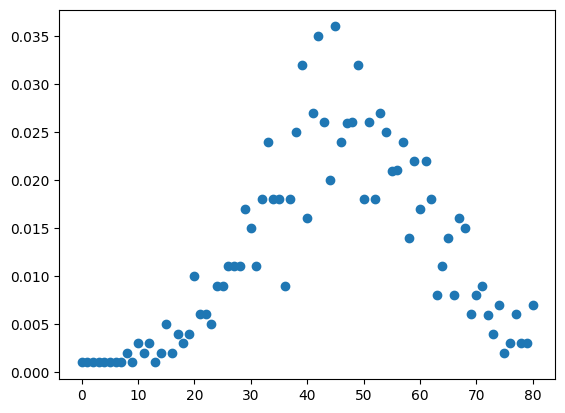

In [36]:
plt.scatter(range(0, 81), values)

## Lab 6
Unsupervised Learning: Clustering.

In [37]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

random_state = 42

In [38]:
X_k_means = X[['reading score', 'writing score']].to_numpy()
y_k_means = y
y_train_reading_writing, y_test_reading_writing = train_test_split(y_k_means)
X_train_reading_writing, X_test_reading_writing = train_test_split(X_k_means)

Let's train a K-Means clusterer on our dataset. It will try to find each cluster's centeroid and assign each instance to the closest centeroid's class.  
`fit_predict` Computes cluster centeroids and predicts cluster index for each sample  
`kmeans.fit_predict`: Check this out. 

In [39]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=random_state)
kmeans_output = kmeans.fit_predict(X_train_reading_writing)

In [40]:
# We use default variable plt for when we have subplots and want to pass the subplot instead of plt
# We use ax instead of plot for this so we can set it to plt by default or to the subplot
def plot_data(X, ax=plt):
    ax.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    ax.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    ax.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True, ax=plt):
    
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    ax.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X, ax)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    
    if show_xlabels:
        ax.xlabel("$x_1$", fontsize=14)
    else:
        ax.tick_params(labelbottom=False)
    if show_ylabels:
        ax.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        ax.tick_params(labelleft=False)

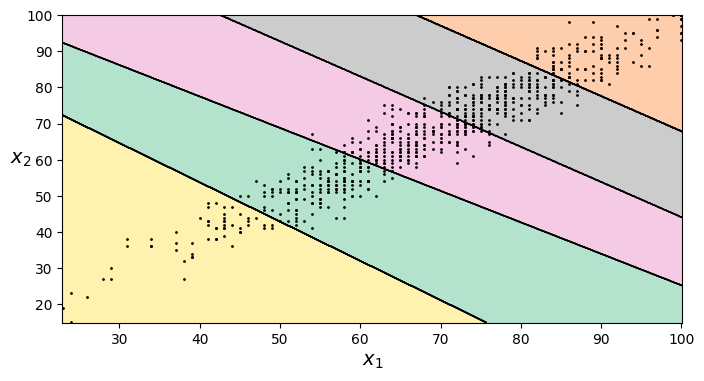

In [41]:
# Plot KMeans algorithm
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_train_reading_writing)
plt.show()

In [42]:
# KMeans for a different number of iterations
kmeans_iter1 = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=random_state)
kmeans_iter2 = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=random_state)
kmeans_iter3 = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=random_state)
kmeans_iter1.fit(X_train_reading_writing)
kmeans_iter2.fit(X_train_reading_writing)
kmeans_iter3.fit(X_train_reading_writing)

c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=42)

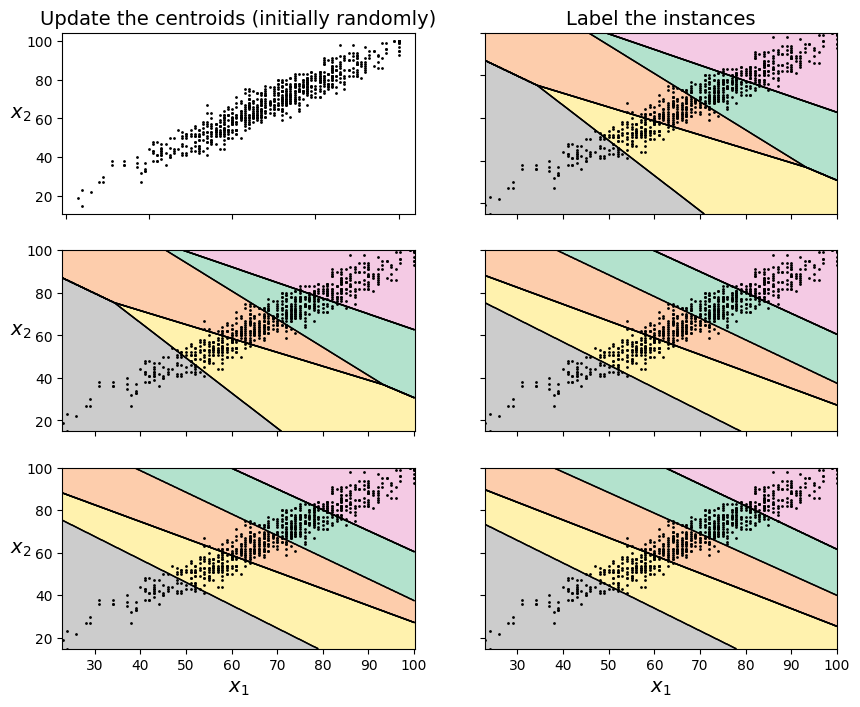

In [43]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X_train_reading_writing)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X_train_reading_writing, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X_train_reading_writing, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X_train_reading_writing, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X_train_reading_writing, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X_train_reading_writing, show_ylabels=False)

plt.show()

### Finding the optimal number of clusters

In [44]:
def plot_clusterer_comparison(clusterers, X):
    for clusterer in clusterers:
        clusterer = clusterer.fit(X)
    
    n_rows = int(len(clusterers) / 2) + 1

    plt.figure(figsize=(10, 3.2 * n_rows))

    for i, clusterer in enumerate(clusterers):
        index = n_rows * 100 + 20 + i + 1
        plt.subplot(index)
        plot_decision_boundaries(clusterer, X)
        plt.title("k = " + str(len(clusterer.cluster_centers_)), fontsize=14)
        index = 0

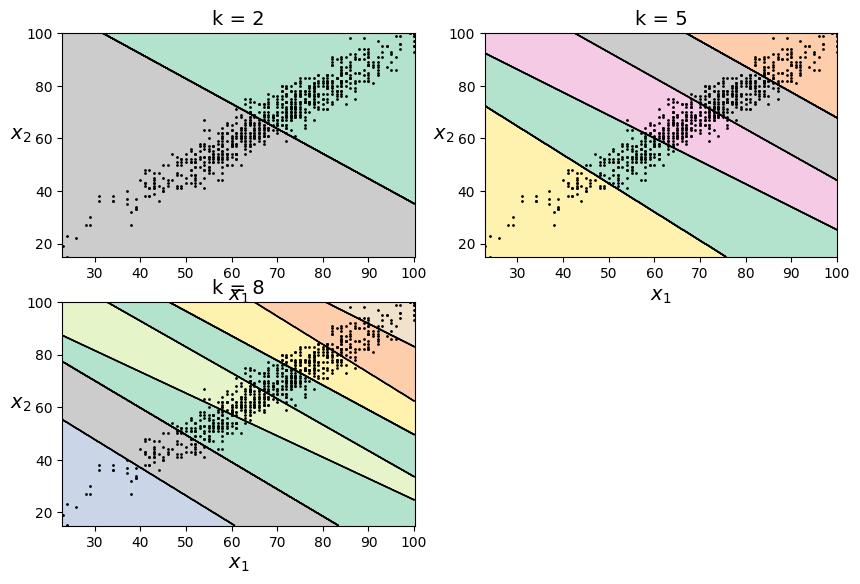

In [45]:
kmeans_k2 = KMeans(n_clusters=2, random_state=random_state)
kmeans_k5 = KMeans(n_clusters=5, random_state=random_state)
kmeans_k8 = KMeans(n_clusters=8, random_state=random_state)

plot_clusterer_comparison([kmeans_k2, kmeans_k5, kmeans_k8], X_train_reading_writing)
plt.show()

### Elbow method
Applies K-Means with a different number of clusters while recording the sum of squared errors. 

In [46]:
sse = []
for k in range(1, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_reading_writing)
    sse.append(kmeans.inertia_)
    
# Create a dataframe containing the number of clusters and the associated sums of squared error
cluster_df = pd.DataFrame({'Cluster':range(1,13), 'sse':sse})
cluster_df.head()

,Cluster,sse
0,1,335207.606667
1,2,122022.131444
2,3,67435.666242
3,4,44323.775745
4,5,31593.538677


Text(0, 0.5, 'Inertia')

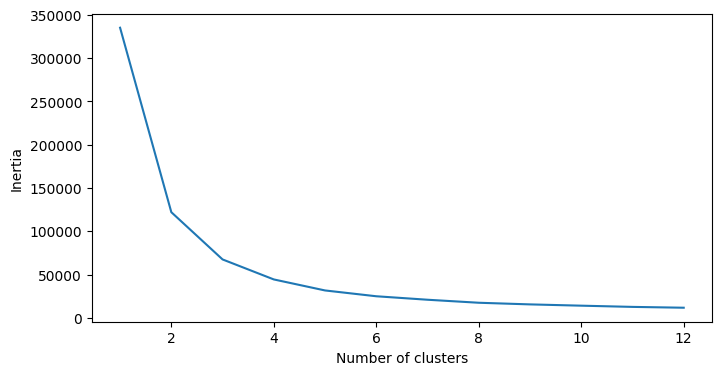

In [47]:
# Plot the elbow method. 
plt.figure(figsize=(8, 4))
plt.plot(cluster_df['Cluster'], cluster_df['sse'])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [48]:
# Now let's find the correct elbow point 
from kneed import KneeLocator

kl = KneeLocator(range(1, 13), sse, curve='convex', direction='decreasing')
"The optimal number of classes according to the elbow method", kl.elbow

('The optimal number of classes according to the elbow method', 3)

### Different Clustering Algorithms
##### Gaussian Mixture Model
To learn Gaussian Mixture Models (diagonal, sperical, tied and full covariance matrices supported). 

In [49]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=k, random_state=random_state)
gm.fit(X_train_reading_writing)
gm.means_

array([[76.53839652, 76.47672373],
       [52.23432741, 48.70120227],
       [99.22777607, 98.35932771],
       [66.23531231, 65.69718338],
       [82.56227194, 80.91698415],
       [42.91335502, 41.76796337],
       [61.59639577, 60.57313367],
       [69.17207583, 74.2347105 ],
       [27.70307302, 27.03658006],
       [89.0090666 , 88.6781244 ],
       [57.30246237, 53.93821548],
       [72.96870966, 69.62474865]])

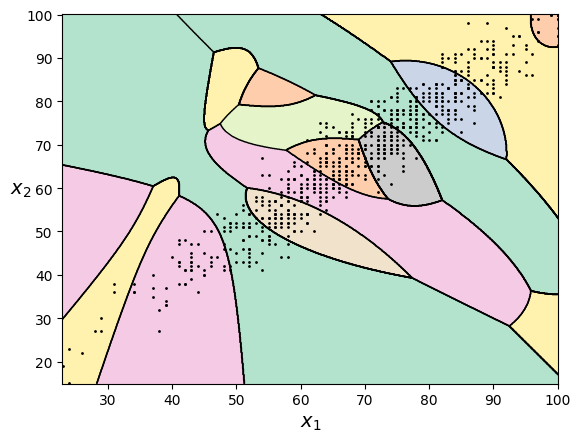

In [50]:
plot_decision_boundaries(gm, X_train_reading_writing, show_centroids=False)

##### Agglomerative Clustering
Recursively merges pairs of clusters of sample data. The algorithm starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects.

In [51]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(distance_threshold=2, linkage='average', n_clusters=None)
ac.fit(X_train_reading_writing)

AgglomerativeClustering(distance_threshold=2, linkage='average',
                        n_clusters=None)

In [52]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
def plot_dendrogram(model, plt=None, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    if plt != None:

        # Plot the corresponding dendrogram
        hierarchy.dendrogram(linkage_matrix, ax=plt, **kwargs)
    else:
        dendrogram(linkage_matrix, **kwargs)

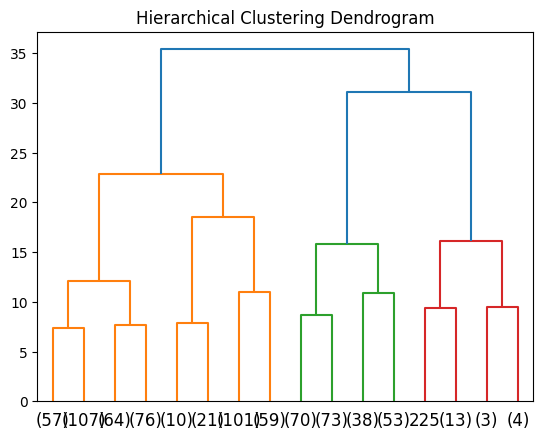

In [53]:
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(ac, truncate_mode='level', p=3)

##### DBSCAN - Density-Based Spatial Clustering of Applications with Noise
The core concept is of core samples - samples that are in areas of high density. A cluster is a set of core samples and a set of non-core samples that are close enough to be neighbors but not themselves core samples. NOTE: Our dataset does not lend itself well to this model.

number of clusters 4
estimated number of noise points 65
number of core samples  577


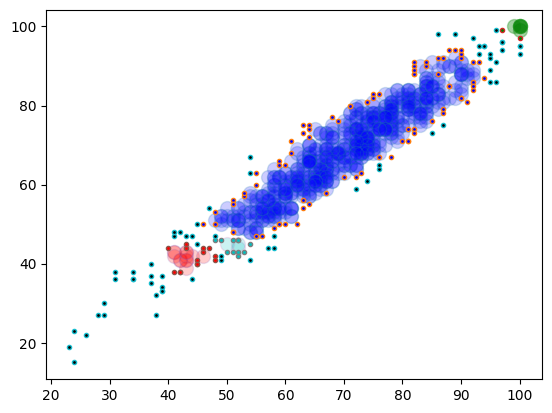

In [54]:
from sklearn.cluster import DBSCAN
from itertools import cycle

# eps is the maximum distance a point can be from another to be considered in the neighborhood
# min_samples is the number of points in a neighborhood to be considered a core point
db = DBSCAN(eps=2.5, min_samples=10)
db.fit(X_train_reading_writing)

core_samples = np.zeros_like(db.labels_, dtype=bool) # creates an array of false values
core_samples[db.core_sample_indices_] = True # set the indices for the core samples to True

no_clusters_db = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0) 
no_noise = list(db.labels_).count(-1) # noise samples are assigned a label of -1
no_core_samples = len(db.core_sample_indices_)

unique_labels = set(db.labels_)

colours = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
def plot_DBSCAN(plt=plt):
    for k, col in zip(unique_labels, colours):
        # remove black and use it for noise
        if k == -1:
            col = [0, 0, 0, 1]

        class_members = db.labels_ == k

        # plot points for core samples
        xy = X_train_reading_writing[class_members & core_samples]
        plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=col, markersize=10, alpha=0.2)

        # plot points for non-core samples
        xy = X_train_reading_writing[class_members & ~core_samples]
        plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=col, markersize=3)
    # plt.show()

print("number of clusters %d" % no_clusters_db)
print("estimated number of noise points %d" % no_noise)
print("number of core samples ", no_core_samples)
plot_DBSCAN()

##### Affinity Propagation
Identifies exemplars in data points and then forms clusters around those exemplars. The algorithm works by simultaneously considering all data points as potential exemplars and exchanging messages between data points until a good set of exemplars and clusters are produced

number of clusters 9


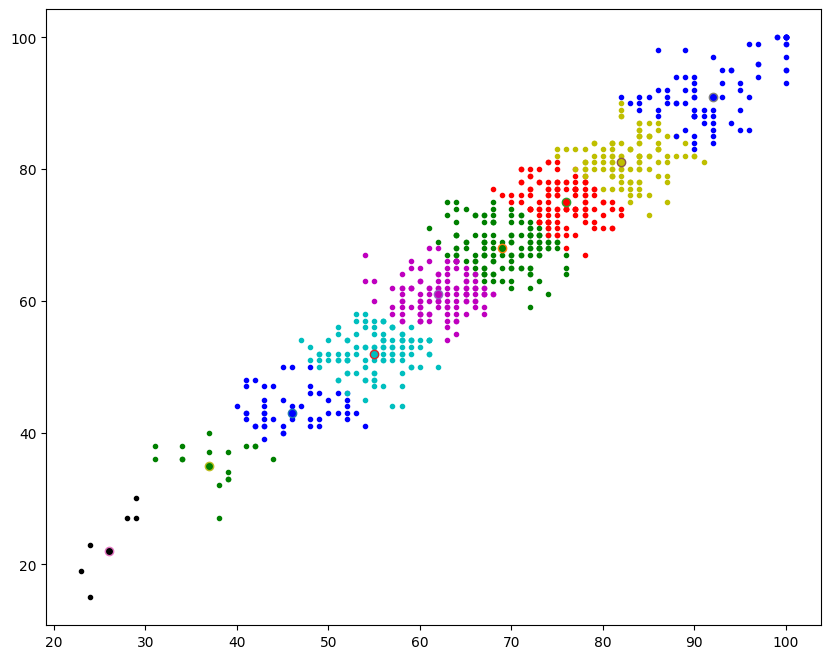

In [55]:
from sklearn.cluster import AffinityPropagation
# Adjusting the preference value will adjust the number of clusters produced (-7760 gives 5 clusters while -1000 gives 10 clusters) - not anymore?
ap = AffinityPropagation(damping=0.9, preference= -1000, random_state=0)
ap.fit(X_train_reading_writing)


cluster_indices = ap.cluster_centers_indices_
no_clusters_ap = len(ap.cluster_centers_indices_)

def plotAP(plt=plt):
    colours = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")

    for k, col in zip(range(no_clusters_ap), colours):
        class_members = ap.labels_ == k

        cluster_center = X_train_reading_writing[cluster_indices[k]]
        xy = X_train_reading_writing[class_members] 
        plt.plot(xy[:, 0], xy[:, 1], col + ".")
        plt.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor=col, markersize=6)
        
        # Draws lines between cluster centers and each surrounding data point
        # for x in X_train_reading_writing[class_members]:
        #     plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
plt.figure(figsize=(10,8))
print("number of clusters %d" % no_clusters_ap)
plotAP()

### Comparing Clustering Methods

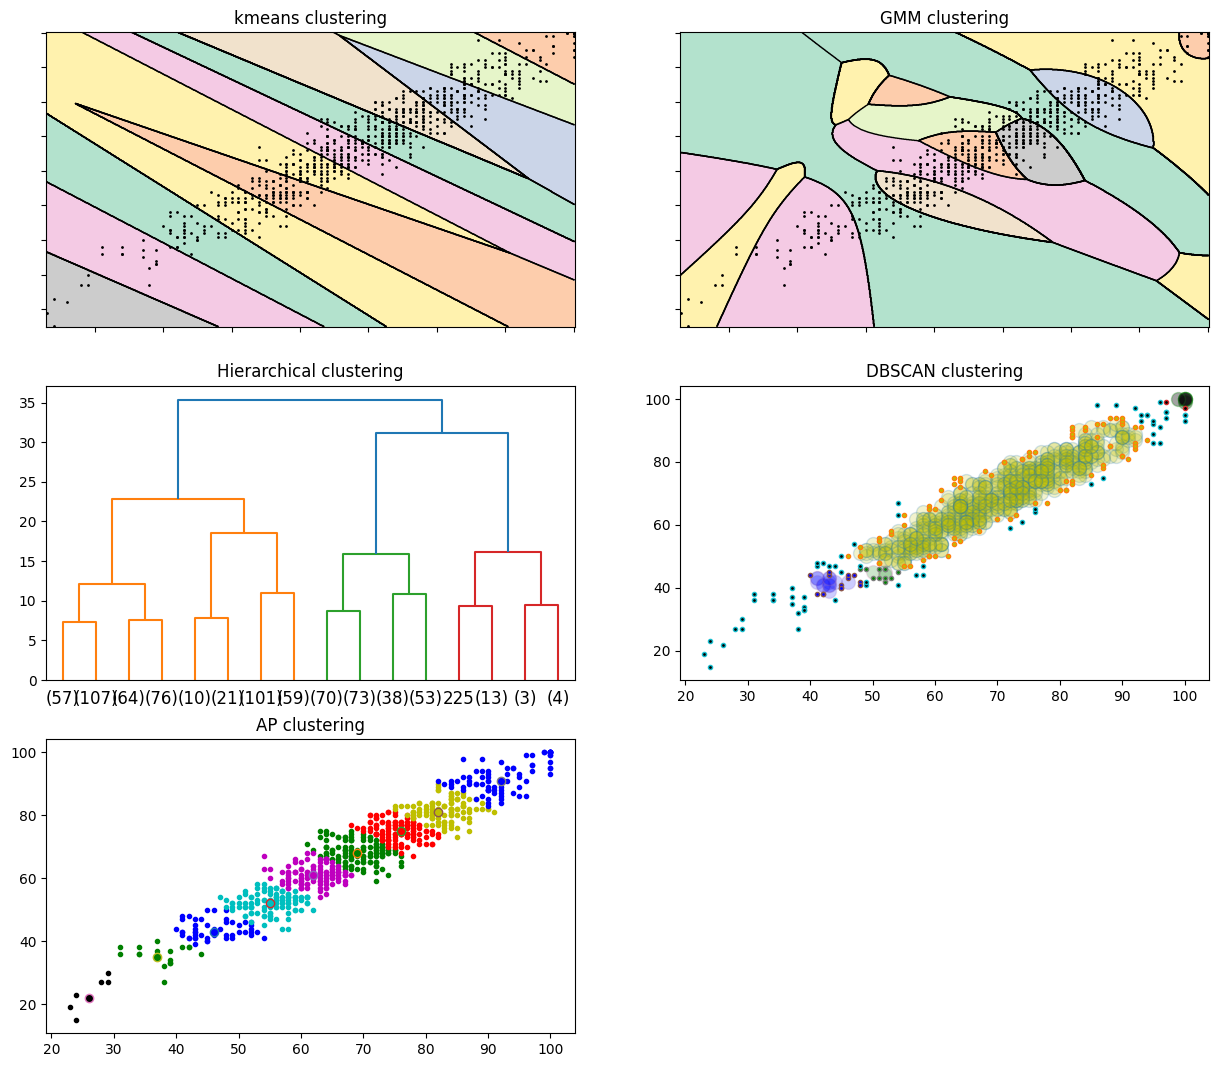

In [56]:
import matplotlib.gridspec as gridspec
from sklearn.metrics import silhouette_score, davies_bouldin_score
# from jqmcvi import base

cluster_models = [gm, ac, db, ap]
cluster_names = ["GMM", "AC", "DBSCAN", "AP"]


compare_fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols=2, nrows=3, figsize=(15, 13))

# def compare(axs):
clustering_metrics = {}
dunn_metric = {}
sil_metric = {}


def compare_cluster_models():
    # compare_fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=3, figsize=(15,13))

    
    plot_decision_boundaries(kmeans, X_train_reading_writing, show_xlabels=False, show_ylabels=False, show_centroids=False, ax=ax1)
    plot_decision_boundaries(gm, X_train_reading_writing, show_xlabels=False, show_ylabels=False, show_centroids=False, ax=ax2)
    plot_dendrogram(ac, plt=ax3, truncate_mode='level', p=3)
    plot_DBSCAN(ax4)
    plotAP(ax5)
    ax6.remove()

    ax1.set_title("kmeans clustering")
    ax2.set_title("GMM clustering")
    ax3.set_title("Hierarchical clustering")
    ax4.set_title("DBSCAN clustering")
    ax5.set_title("AP clustering")


    





compare_cluster_models()



In [57]:
# Clustering Eval
for model, name in zip(cluster_models, cluster_names):
        print(model)
        
        clustering_metrics[name] = davies_bouldin_score(X_train_reading_writing, model.fit_predict(X_train_reading_writing))
        
        sil_metric[name] = silhouette_score(X_train_reading_writing, model.fit_predict(X_train_reading_writing))

        

df = pd.DataFrame()

# for thing in clustering_metrics:
#     pd.concat(df, thing)

met = pd.DataFrame([clustering_metrics, sil_metric])
# met = pd.concat([met, sil_metric.to_frame().T], ignore_index=True)

met = met.rename(index={0: "davies score", 1: "silhouette score"})

met.head()

GaussianMixture(n_components=12, random_state=42)
AgglomerativeClustering(distance_threshold=2, linkage='average',
                        n_clusters=None)
DBSCAN(eps=2.5, min_samples=10)
AffinityPropagation(damping=0.9, preference=-1000, random_state=0)


,GMM,AC,DBSCAN,AP
davies score,0.803825,0.538816,2.151745,0.748138
silhouette score,0.352322,0.381976,0.106942,0.376003


##### Finding Optimal Clusters

The elbow method is a popular method in determining the optimal number of clusters for a data set. We want to calculate the sum of differences of squares within a cluster or the WSS (within-cluster sum of squares). The goal of this method is to minimise this number as much as possible without choosing too many clusters such that there is little improvement in this number. This is seen in the kmeans algorithm above. We can see that there is an "elbow" at cluster 3 and after that the benefits of adding extra clusters starts to diminish.

##### Average Silhouette Method 
The average silhoutte method determines how consistently each sample lies within its cluster. The silhouette value is a measure of how similar a sample is to its own cluster compared to other clusters. If the silhouette method gives a high value then the sample is well matched to its own cluster, and badly matched to neighbouring clusters. It is calculated using the average intra-cluster distance and the average nearest cluster distance for every sample.

We can see that applying the silhouette score to the algorithms, that DBSCAN is indifferent to its clustering - many of the samples 

##### Cluster Validity
Cluster validity is split into 3 types:
    External Index - measures the extent to which cluster labels match externally supplied class labels
    Internal Index - measures how consistently a sample point falls within its cluster
    Relative Index - used to compare 2 different clusterings
Cluster validity is used in the affinity propagation algorithm which checks samples for their likeness to a cluster center. If the sample is more closely related to a different cluster center then the point is moved.

##### Summary
Overall, clustering methods do not fit our data set very well, and as such makes it harder to evaluate how well they performed. However, from the graphs we can see that there are 2 standout examples - Gaussian Mixture Model and Affinity Propagation. Looking at the scores provided by the testing we can also see this is backed up by the silhouette score and the davies score.


## Lab 7 
Supervised Learning. There is a new dataset provided to use for all supervised learning tasks.  
The smiley faces dataset contains 144 unique images of dimensions 9x9x1 belonging to 2 categories (happy and sad).
- The file "smiley_X.npy" contains the images.
- The file "smiley_Y.npy" contains the corresponding classes (0 for sad, 1 for happy).

They are serialized with numpy, to load use:
```
X = np.load('path/to/smiley_X.npy')
```

In [498]:
X = np.load('./data/smiley_X.npy')
y = np.load('./data/smiley_y.npy')

X = X[:,:,:,0].reshape(144, 81)  # Get rid of the class attribute

X_train, X_test, y_train, y_test = train_test_split(X, y)

(144, 9, 9, 1)